In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import statsmodels.api as sm

In [2]:
data=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/5.A_Multiple Linear Regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data1=data.rename({'R&D Spend':'rds','Administration':'admn','Marketing Spend':'mkts'},axis=1)
data1.head()

,rds,admn,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data1.describe()

,rds,admn,mkts,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data1.corr()

,rds,admn,mkts,Profit
rds,1.000000,0.241955,0.724248,0.972900
admn,0.241955,1.000000,-0.032154,0.200717
mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


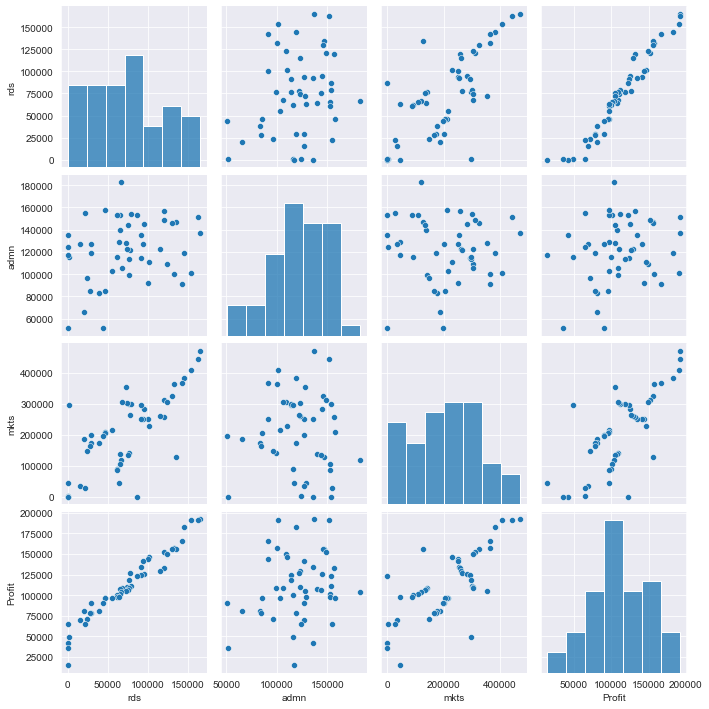

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Preparing a Model

In [8]:
model=smf.ols('Profit~rds+admn+mkts',data=data1).fit()

In [9]:
model.params

Intercept    50122.192990
rds              0.805715
admn            -0.026816
mkts             0.027228
dtype: float64

In [10]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
rds          17.846374
admn         -0.525507
mkts          1.655077
dtype: float64 
 Intercept    1.057379e-09
rds          2.634968e-22
admn         6.017551e-01
mkts         1.047168e-01
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [12]:
mod_ad=smf.ols('Profit~admn',data=data1).fit()
print(mod_ad.tvalues,'\n',mod_ad.pvalues)

Intercept    3.040044
admn         1.419493
dtype: float64 
 Intercept    0.003824
admn         0.162217
dtype: float64


In [13]:
mod_mkt=smf.ols('Profit~mkts',data=data1).fit()
print(mod_mkt.tvalues,'\n',mod_mkt.pvalues)

Intercept    7.808356
mkts         7.802657
dtype: float64 
 Intercept    4.294735e-10
mkts         4.381073e-10
dtype: float64


In [14]:
mod_rd=smf.ols('Profit~rds',data=data1).fit()
print(mod_rd.tvalues,'\n',mod_rd.pvalues)

Intercept    19.320288
rds          29.151139
dtype: float64 
 Intercept    2.782697e-24
rds          3.500322e-32
dtype: float64


# Calculating VIF

In [15]:
rsq_rds=smf.ols('rds~admn+mkts',data=data1).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_admn=smf.ols('admn~rds+mkts',data=data1).fit().rsquared
vif_admn=1/(1-rsq_admn)

rsq_mkts=smf.ols('mkts~rds+admn',data=data1).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

In [16]:
print(vif_rds,vif_mkts,vif_admn)

2.468903069994701 2.3267732905308773 1.175091007055045


In [17]:
d1 = {'Variables':['rds','admn','mkts'],'VIF':[vif_rds,vif_admn,vif_mkts]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rds,2.468903
1,admn,1.175091
2,mkts,2.326773


# Residual Analysis

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


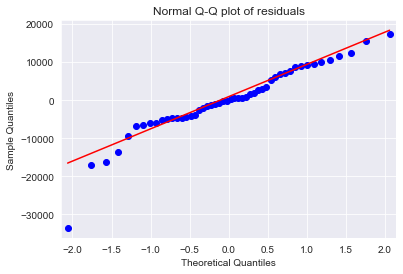

In [18]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<0.8))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49], dtype=int64)]

In [20]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

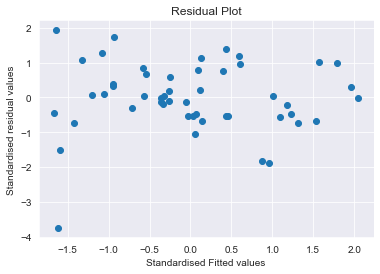

In [21]:
plt.scatter(get_standardised_values(model.fittedvalues),
            get_standardised_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardised Fitted values')
plt.ylabel('Standardised residual values')
plt.show()

# Residual vs Regressors

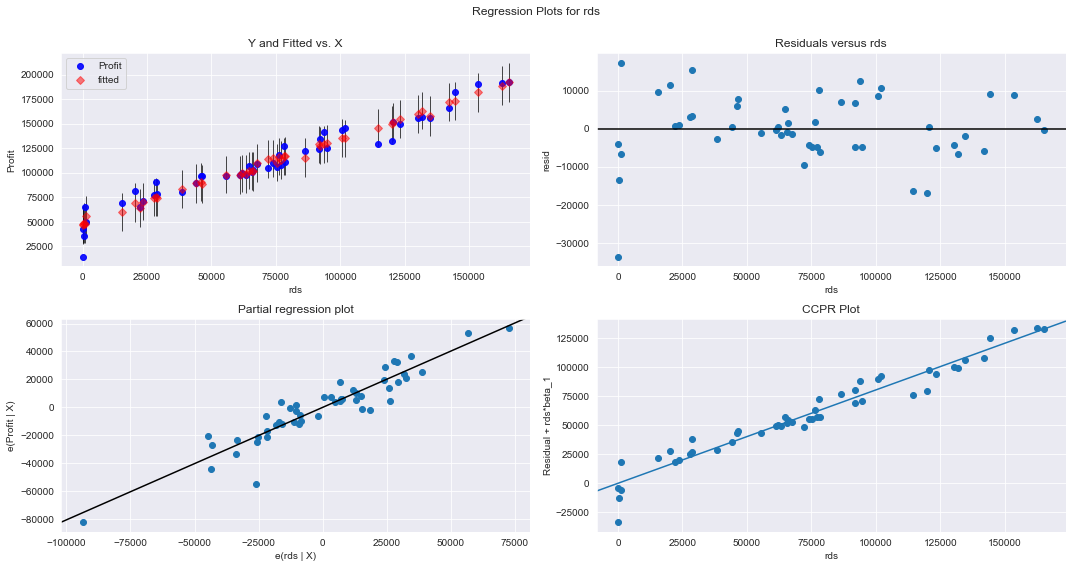

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'rds',fig=fig)
plt.show()

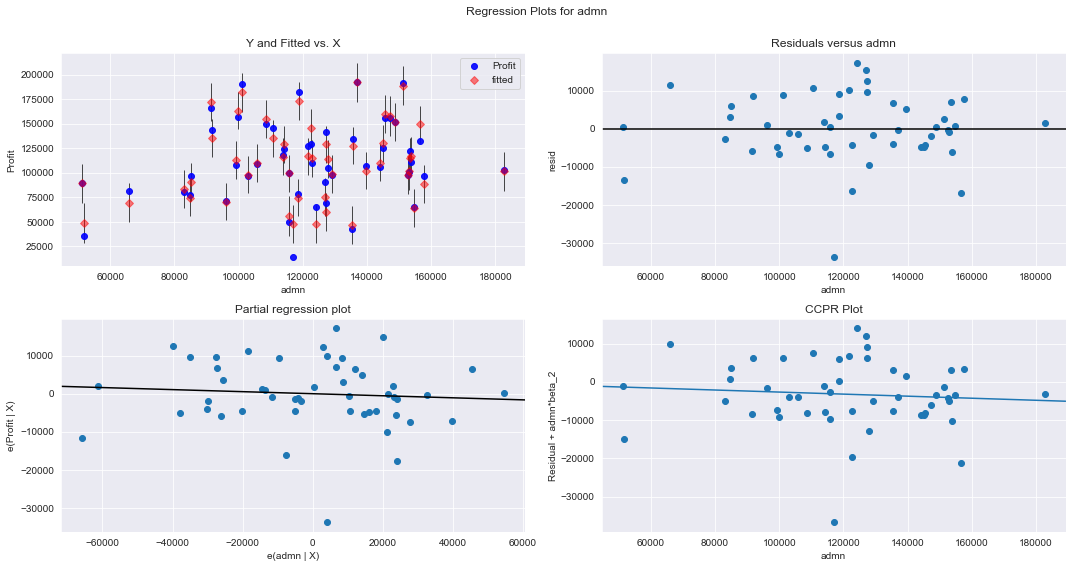

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'admn',fig=fig)
plt.show()

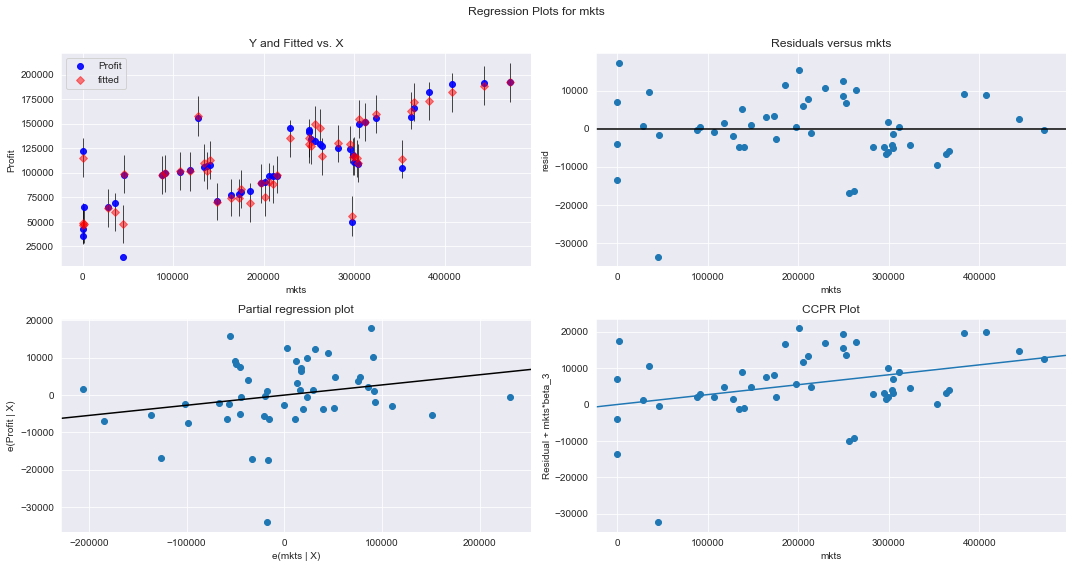

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'mkts',fig=fig)
plt.show()

# Model Deletion Diagnostics

In [25]:
#Cooks's distance
mod_influence=model.get_influence()
(c,_)=mod_influence.cooks_distance

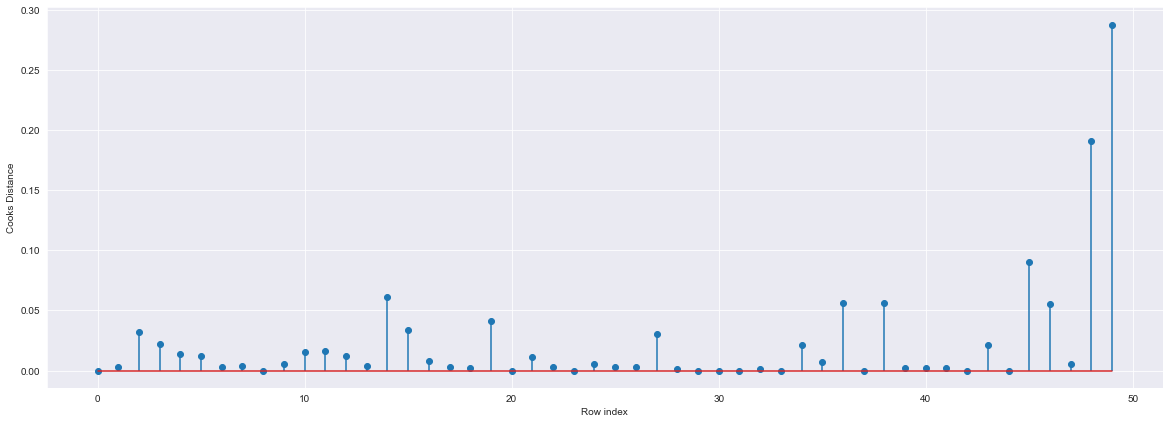

In [26]:
#plot the influencers using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

# High Influence Points

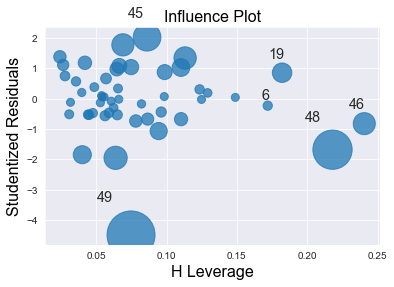

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

From the above plot it is evident that point 49 is the influencer.

In [29]:
data1[data1.index.isin([49])]

,rds,admn,mkts,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model & Final Model

In [30]:
df=data1.drop(data.index[[49]],axis=0).reset_index()
df.head()

,index,rds,admn,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
final_model=smf.ols('Profit~rds+admn+mkts',data=df).fit()

In [32]:
final_model.rsquared,final_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

# Model Prediction

In [33]:
newdata=pd.DataFrame({'rds':100000,'admn':120000,'mkts':45000},index=[1])

In [34]:
final_model.predict(newdata)

1    129153.975559
dtype: float64